In [1]:
import numpy as np
import basis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Examples of Basis
<hr>

In the following notebook we detail some examples of the basis systems that can be created wit hthe ``basis`` package. We show an example from each of:

* Monomial basis system.
* Exponential basis system.
* Fourier basis system.
* B-spline basis system.

## Formatting Function
<hr>

The cell below defines a basic formatting function whci transform a basis system matrix into a melted ```pandas``` dataframe for use with the ```seaborn``` plotting facilities.

In [2]:


def format_B(x, B, q=0):
    if q != 0:
        df = pd.DataFrame(
            np.concatenate((x[:, None], B), axis=-1),
            columns=["x"] + [r"$D^{}B_{}$".format('{'+str(q)+'}', '{'+str(i+1)+'}') for i in np.arange(B.shape[-1])],
        )
        return df.melt('x', var_name="B", value_name=r"$D^{}B_k(t)$".format('{'+str(q)+'}'))
    else:
        df = pd.DataFrame(
            np.concatenate((x[:, None], B), axis=-1),
            columns=["x"] + [r"$B_{}$".format('{'+str(i+1)+'}') for i in np.arange(B.shape[-1])],
        )
        return df.melt('x', var_name="B", value_name=r"$B_k(t)$")

## Monomial Basis System
<hr>

The moonomial basis functions are the collection: 

$$ B_k(t) = t^{k-1} $$

for $k=1,2,\dots, K$.

The following section shows the creation of a ``Monomial`` basis system using ``16`` basis function over the domain $[-1,1]$. We evaluate the basis at ``128`` points in this domain. We also evaluate the second derivative penalty matrix with our number of samples for the numerical approximation set to $2^{12} + 1$. 

In [3]:
x = np.linspace(-1, 1, 128) # Setting up the domain.
q=0 # The derivative of the basis functions to evaluate.
bs = basis.Monomial(x[[0, -1]], 16) # Creation of the basis system.
B = bs(x, q) # Evaluation of the system.
P = bs.penalty(2, k=12) # Evaluation of the penalty matrix

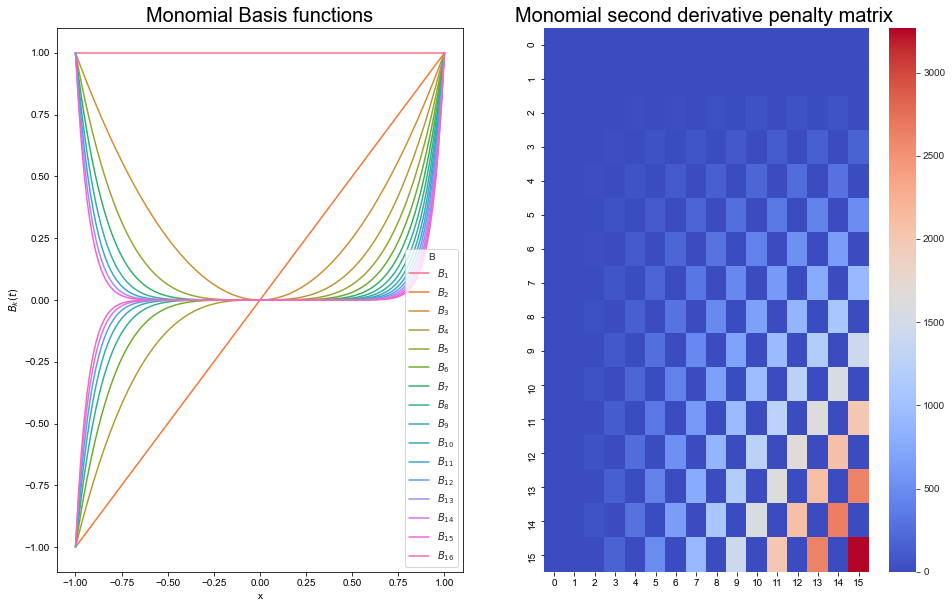

In [4]:
df = format_B(x, B, q)
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
sns.set_style("whitegrid")
ax[0] = sns.lineplot(data=df, x=df.columns[0], y=df.columns[-1], hue=df.columns[1], ax=ax[0])
ax[0].set_title('Monomial Basis functions', fontsize=20)
ax[1] = sns.heatmap(P, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Monomial second derivative penalty matrix ', fontsize=20)
plt.show()

## Exponential Basis System
<hr>

The exponential basis functions are the collection:

$$ B_k(t) = e^{\theta_k t} $$

for $k=1,2\dots,K$ where $\theta_k$ form the rate vector of the basis function. 

The following section shows the creation of an ``Exponential`` basis system of ``8`` basis function over the domain $[0, 1]$. We use the standard rate vector of ``[0, 1, 2, ..., 7]``. We evaluate the basis at ``128`` points in this domain. We also evaluate the second derivative penalty matrix with our number of samples for the numerical approximation set to $2^{12}+1$.

In [5]:
x = np.linspace(-1, 1, 128) # Setting up the domain.
q=0 # The derivative of the basis functions to evaluate.
bs = basis.Exponential(x[[0,-1]], 8) # Creation of the basis system.
B = bs(x, q) # Evaluation of the system.
P = bs.penalty(2, k=12) # Evaluation of the penalty matrix

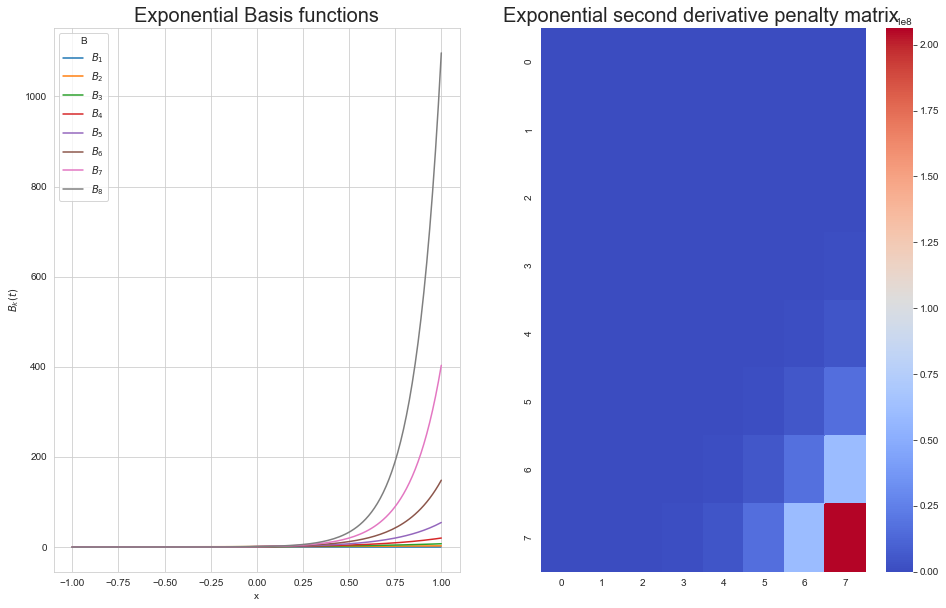

In [6]:
df = format_B(x, B, q)
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
sns.set_style("whitegrid")
ax[0] = sns.lineplot(data=df, x=df.columns[0], y=df.columns[-1], hue=df.columns[1], ax=ax[0])
ax[0].set_title('Exponential Basis functions', fontsize=20)
ax[1] = sns.heatmap(P, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Exponential second derivative penalty matrix ', fontsize=20)
plt.show()

## Fourier Basis System
<hr>

The fourier basis functions are the collection:

$$ B_0(t) = 1 $$

$$B_{2r} = \cos\left(2 \omega r t\right) $$

$$B_{2r+1}(t) = \sin\left(2 \omega r t\right) $$

where $r = 1,2,..(0.5*(K-1))$, and $\omega = \frac{2 \pi}{p}$ where $p$ is the period of the basis functions.

The following shows the construciton of the fourier basis with a second degree penalty matrix with the period equal to the length of the domain. That is our ``domain`` is $[-1,1]$ with period ``2``. We consider ``K`` to be 5. Since our period is equal to the domain length we do not use an numerical approximation for the penalty matrix ``P``.

In [7]:
x = np.linspace(-1, 1, 128) # Setting up the domain.
q=0 # The derivative of the basis functions to evaluate.
bs = basis.Fourier(x[[0,-1]], 5, 2) # Creation of the basis system.
B = bs(x, q) # Evaluation of the system.
P = bs.penalty(2) # Evaluation of the penalty matrix

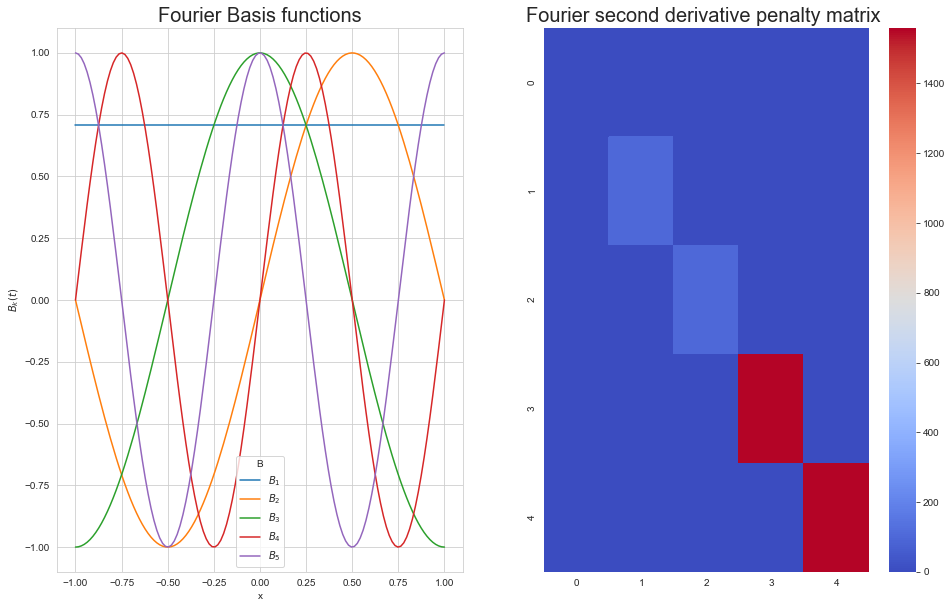

In [8]:
df = format_B(x, B, q)
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
sns.set_style("whitegrid")
ax[0] = sns.lineplot(data=df, x=df.columns[0], y=df.columns[-1], hue=df.columns[1], ax=ax[0])
ax[0].set_title('Fourier Basis functions', fontsize=20)
ax[1] = sns.heatmap(P, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Fourier second derivative penalty matrix ', fontsize=20)
plt.show()